In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate();

  Activating environment at `c:\Users\william\Desktop\robot-dynamics-playground\demos\Project.toml`

In [2]:
using DifferentialEquations
using Plots

In [3]:
include(joinpath(@__DIR__,"..","RobotDynamics","RobotDynamics.jl"));

In [4]:
model = CartTriplePendulum(1,1,1, input=:acceleration);

In [5]:
# include(joinpath(@__DIR__,"..","OptimalControl","OptimalControl.jl"));

# Δt = 1/40
# state_trans_func = (x,u) -> dynamics_rk4(model, x, u, Δt)

# ∂A∂x = OptimalControl.∂Aᵀ∂x_func(state_trans_func, [0, π/6, π/4, π/6, 0, 0, 0, 0], 0)

In [6]:
Δt = 1/40
t = 0:Δt:5

x₀ = [0, π/6, π/4, π/6, 0, 0, 0, 0]
prob = ODEProblem((x,p,t)->dynamics(model, x, 0.0), x₀, (t[1],t[end]))
sol = solve(prob; saveat=t)
X = sol.u;

In [7]:
vis = mc.Visualizer()
display(mc.render(vis))

set_mesh!(vis, model)
animate!(vis, model, X, Δt)

┌ Info: Listening on: 127.0.0.1:8700, thread id: 1
└ @ HTTP.Servers C:\Users\william\.julia\packages\HTTP\bDoga\src\Servers.jl:367
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8700
└ @ MeshCat C:\Users\william\.julia\packages\MeshCat\I6NTX\src\visualizer.jl:63


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), Set{HTTP.WebSockets.WebSocket}(), ip"127.0.0.1", 8700))

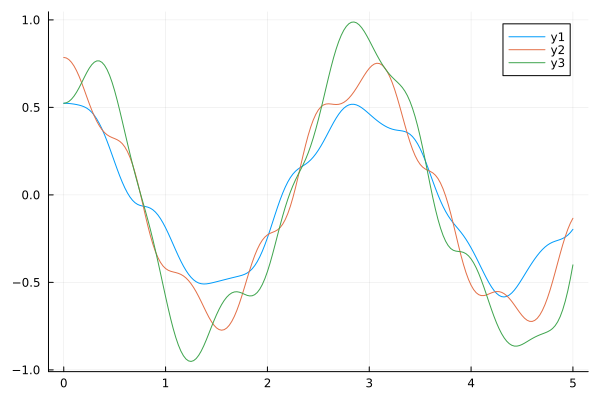

In [8]:
data = hcat(X...)'

plot(t, data[:,2:4])